<a href="https://colab.research.google.com/github/Ana-Paula-Ferrari/exerc.Python/blob/exerc%C3%ADcios/An%C3%A1lise%20de%20dados%20com%20Python%20e%20Pandas%7CProj_DIO_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd


In [2]:
#Trabalhando com vários arquivos
df1 = pd.read_excel('/content/drive/MyDrive/Cusro_Python_Pandas_Digital_Innovation-master/datasets/Aracaju.xlsx')
df2 = pd.read_excel('/content/drive/MyDrive/Cusro_Python_Pandas_Digital_Innovation-master/datasets/Fortaleza.xlsx')
df3 = pd.read_excel('/content/drive/MyDrive/Cusro_Python_Pandas_Digital_Innovation-master/datasets/Natal.xlsx')
df4 = pd.read_excel('/content/drive/MyDrive/Cusro_Python_Pandas_Digital_Innovation-master/datasets/Recife.xlsx')
df5 = pd.read_excel('/content/drive/MyDrive/Cusro_Python_Pandas_Digital_Innovation-master/datasets/Salvador.xlsx')


In [3]:
#juntando os arquivos
df = pd.concat([df1,df2,df3,df4,df5])

In [4]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [5]:
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [ ]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [6]:
#Gera uma amostra dos dados contidos na tabela
df.sample(6)

,Cidade,Data,Vendas,LojaID,Qtde
23,Fortaleza,2019-01-01,85.90,1004,5
59,Aracaju,2018-01-01,15.07,1523,7
183,Salvador,2019-01-02,120.23,1037,2
18,Fortaleza,2019-01-01,38.31,1002,3
95,Aracaju,2018-01-01,127.43,1522,9
44,Natal,2019-01-03,500.00,852,4


In [7]:
#Alterando o tipo de dado da coluna LojaID
df['LojaID'] = df['LojaID'].astype('object')

In [8]:
#Consultando linhas com valores faltantes
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [9]:
#Substituindo os valores nulos pela média
df['Vendas'].fillna(df['Vendas'].mean(), inplace=True)

In [10]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [11]:
#Substituindo os valores nulos por zero
df['Vendas'].fillna(0, inplace=True)

In [12]:
#Apagando as linhas com valores nulos
df.dropna(inplace=True)

In [13]:
#Apagando as linhas que estejam com valores nulos com base apenas em 1 coluna
df.dropna(subset=['Vendas'], inplace=True)

In [14]:
#Removendo linhas que estejam com valores faltantes em todas as colunas
df.dropna(how='all', inplace=True)

In [15]:
#Criando a coluna de receita
df['Receita'] = df['Vendas'].mul(df['Qtde'])

In [16]:
#Se não tivesse a coluna receita
df['Receita/Vendas'] = df['Receita']/df['Vendas']

In [17]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0


In [18]:
#Retornando a maior receita
df['Receita'].max()

3544.0

In [19]:
#Retornando a menor receita
df['Receita'].min()

3.34

In [20]:
#Top nlargest
df.nlargest(3, 'Receita')

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0


In [21]:
#Piores receitas
df.nsmallest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
118,Aracaju,2018-01-01,3.34,1522,1,3.34,1.0
65,Recife,2019-01-01,4.01,981,1,4.01,1.0
92,Natal,2019-01-02,4.57,1035,1,4.57,1.0


In [22]:
#Agrupamento por cidade
df.groupby('Cidade')['Receita'].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [23]:
#Ordenando o conjunto de dados pela coluna Receita
df.sort_values('Receita', ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
30,Natal,2018-10-02,856.0,853,4,3424.0,4.0
41,Natal,2018-05-20,835.0,852,4,3340.0,4.0
38,Natal,2018-02-25,828.0,852,4,3312.0,4.0
10,Natal,2018-10-27,828.0,852,4,3312.0,4.0
69,Natal,2019-03-24,817.0,852,4,3268.0,4.0
62,Natal,2018-02-10,793.0,854,4,3172.0,4.0
52,Natal,2018-04-27,778.0,854,4,3112.0,4.0


In [25]:
#Transformando a coluna de data em tipo inteiro
df['Data'] = df['Data'].astype('int64');

In [26]:
#Verificando o tipo de dado de cada coluna
df.dtypes

Cidade             object
Data                int64
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
Receita/Vendas    float64
dtype: object

In [27]:
#Transformando a coluna de data em data
df['Data'] = pd.to_datetime(df['Data'])
df.dtypes

Cidade                    object
Data              datetime64[ns]
Vendas                   float64
LojaID                    object
Qtde                       int64
Receita                  float64
Receita/Vendas           float64
dtype: object

In [28]:
#Agrupamento por ano e somando as receitas
df.groupby(df['Data'].dt.year)['Receita'].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [29]:
#Criando uma nova coluna com o ano
df['Ano_venda'] = df['Data'].dt.year

In [30]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_venda
4,Fortaleza,2019-01-01,14.25,1004,6,85.50,6.0,2019
133,Natal,2019-01-02,153.71,1035,1,153.71,1.0,2019
156,Natal,2019-01-02,36.14,1037,3,108.42,3.0,2019
65,Recife,2019-01-01,4.01,981,1,4.01,1.0,2019
197,Natal,2019-01-02,10.45,1036,2,20.90,2.0,2019


In [31]:
#Extraindo o mês e o dia
df['Mês_venda'], df['Dia_venda'] = (df['Data'].dt.month, df['Data'].dt.day)

In [32]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_venda,Mês_venda,Dia_venda
64,Recife,2019-01-01,89.32,983,2,178.64,2.0,2019,1,1
53,Recife,2019-01-01,37.05,983,6,222.30,6.0,2019,1,1
102,Natal,2019-01-02,40.84,1034,3,122.52,3.0,2019,1,2
120,Recife,2019-03-02,184.90,982,4,739.60,4.0,2019,3,2
47,Aracaju,2018-01-01,80.46,1520,2,160.92,2.0,2018,1,1


In [33]:
#Retornando a data mais antiga
df['Data'].min()

Timestamp('2018-01-01 00:00:00')

In [34]:
#Calculando a diferença de dias
df['diferenca_dias'] = df['Data'] - df['Data'].min()

In [35]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_venda,Mês_venda,Dia_venda,diferenca_dias
47,Aracaju,2018-01-01,80.46,1520,2,160.92,2.0,2018,1,1,0 days
187,Salvador,2019-01-02,3.85,1035,3,11.55,3.0,2019,1,2,366 days
96,Fortaleza,2019-01-01,23.31,1004,4,93.24,4.0,2019,1,1,365 days
110,Fortaleza,2019-03-02,51.98,983,6,311.88,6.0,2019,3,2,425 days
82,Fortaleza,2019-01-01,14.03,1004,5,70.15,5.0,2019,1,1,365 days


In [36]:
#Criando a coluna Trimestre
df['trimestre_venda'] = df['Data'].dt.quarter

In [37]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_venda,Mês_venda,Dia_venda,diferenca_dias,trimestre_venda
233,Natal,2019-01-03,172.4,1036,2,344.8,2.0,2019,1,3,367 days,1
79,Natal,2019-02-28,557.0,852,4,2228.0,4.0,2019,2,28,423 days,1
3,Natal,2019-01-07,271.0,854,3,813.0,3.0,2019,1,7,371 days,1
118,Fortaleza,2019-03-02,17.7,981,5,88.5,5.0,2019,3,2,425 days,1
50,Natal,2019-03-08,324.0,854,4,1296.0,4.0,2019,3,8,431 days,1


In [38]:
#Filtrando as vendas de 2019 do mês de março
vendas_marco_19 = df.loc[(df['Data'].dt.year == 2019) & (df['Data'].dt.month == 3)]
vendas_marco_19

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_venda,Mês_venda,Dia_venda,diferenca_dias,trimestre_venda
108,Fortaleza,2019-03-02,152.89,981,4,611.56,4.0,2019,3,2,425 days,1
109,Fortaleza,2019-03-02,18.90,982,6,113.40,6.0,2019,3,2,425 days,1
110,Fortaleza,2019-03-02,51.98,983,6,311.88,6.0,2019,3,2,425 days,1
111,Fortaleza,2019-03-02,8.00,981,3,24.00,3.0,2019,3,2,425 days,1
112,Fortaleza,2019-03-02,133.59,982,1,133.59,1.0,2019,3,2,425 days,1
...,...,...,...,...,...,...,...,...,...,...,...,...
137,Salvador,2019-03-02,51.66,1036,3,154.98,3.0,2019,3,2,425 days,1
138,Salvador,2019-03-02,212.03,1037,3,636.09,3.0,2019,3,2,425 days,1
139,Salvador,2019-03-02,169.01,1036,1,169.01,1.0,2019,3,2,425 days,1
140,Salvador,2019-03-02,20.79,1036,2,41.58,2.0,2019,3,2,425 days,1


In [39]:
df['LojaID'].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

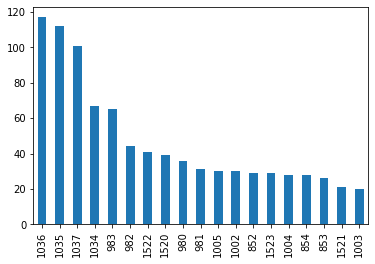

In [40]:
df['LojaID'].value_counts(ascending=False).plot.bar()

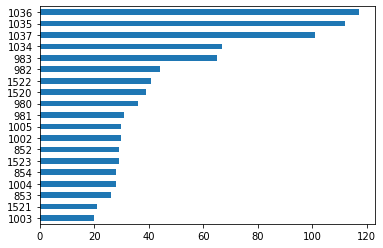

In [41]:
df['LojaID'].value_counts(ascending=True).plot.barh();

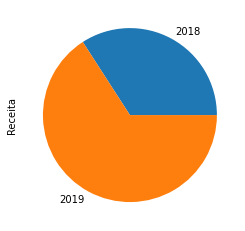

In [42]:
#Gráfico de Pizza
df.groupby(df['Data'].dt.year)['Receita'].sum().plot.pie()

In [43]:
#Total de vendas por cidade
df['Cidade'].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

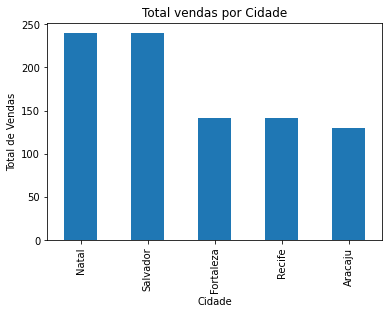

In [44]:
#Adicionando um título e alterando o nome dos eixos
import matplotlib.pyplot as plt
df['Cidade'].value_counts().plot.bar(title='Total vendas por Cidade')
plt.xlabel('Cidade') 
plt.ylabel('Total de Vendas');

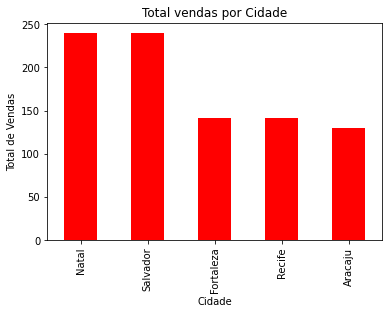

In [45]:
#Alterando a cor
df['Cidade'].value_counts().plot.bar(title='Total vendas por Cidade', color='red')
plt.xlabel('Cidade')
plt.ylabel('Total de Vendas');

In [46]:
#Alterando o estilo
plt.style.use("ggplot") #Buscar o estilo na pag. Matplot

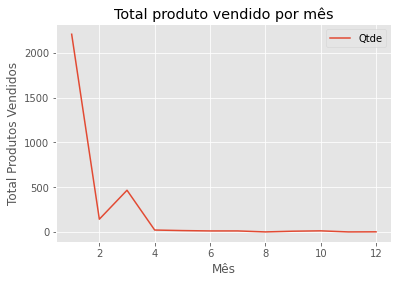

In [47]:
df.groupby(df['Mês_venda'])['Qtde'].sum().plot(title='Total produto vendido por mês')
plt.xlabel('Mês')
plt.ylabel('Total Produtos Vendidos');
plt.legend();

In [48]:
df.groupby(df['Mês_venda'])['Qtde'].sum()

Mês_venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [49]:
#Selecionando apenas as vendas de 2019
df_2019 = df[df['Ano_venda'] == 2019]

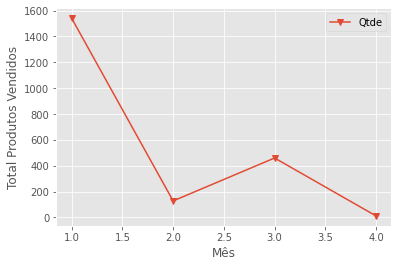

In [50]:
#Total produtos vendidos por mês
df_2019.groupby(df_2019['Mês_venda'])['Qtde'].sum().plot(marker = 'v')#marker = marcador * o v entre outros
plt.xlabel('Mês')
plt.ylabel('Total Produtos Vendidos');
plt.legend()

In [ ]:
#Total produtos vendidos por mês
df_2019.groupby(df_2019['Mês_venda'])['Qtde'].sum()

Mês_venda
1    1541
2     128
3     460
4      12
Name: Qtde, dtype: int64

(array([191., 193., 221.,  85.,  54.,  61.,  38.,  31.,  14.,   6.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <a list of 10 Patch objects>)

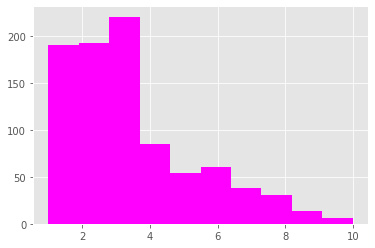

In [ ]:
#Histograma
plt.hist(df['Qtde'], color='magenta')

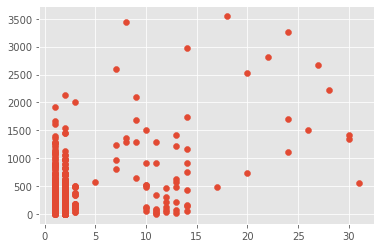

In [ ]:
#Gráfico de dispersão
plt.scatter(x = df_2019['Dia_venda'], y = df_2019['Receita']);

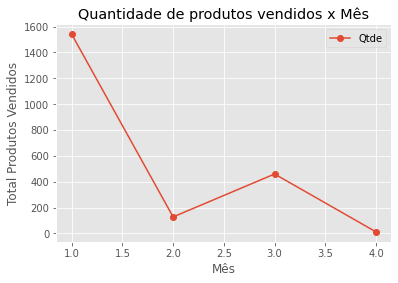

In [ ]:
#Salvando em png
df_2019.groupby(df_2019['Mês_venda'])['Qtde'].sum().plot(marker = 'o')
plt.title('Quantidade de produtos vendidos x Mês')
plt.xlabel("Mês")
plt.ylabel('Total Produtos Vendidos');
plt.legend()
plt.savefig('gráfico QTDE x Mês.png')#Salvando em png